# 📊 Twitch Streaming Data Insights

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file (update this if the filename is different)
df = pd.read_csv("english-2025-04-10T17-59-39.273Z.csv")

# Preview the data
df.head()

,handle,average_viewers,hours_streamed,total_followers,twitch_link
0,kaicenat,103655,65.9,16300000.0,https://twitch.tv/kaicenat
1,blastpremier,57122,96.0,2090000.0,https://twitch.tv/blastpremier
2,caseoh_,56525,102.4,6900000.0,https://twitch.tv/caseoh_
3,caedrel,54268,220.7,1220000.0,https://twitch.tv/caedrel
4,pathofexile,47096,8.1,419000.0,https://twitch.tv/pathofexile


from matplotlib import pyplot as plt
_df_0['average_viewers'].plot(kind='hist', bins=20, title='average_viewers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['hours_streamed'].plot(kind='hist', bins=20, title='hours_streamed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['total_followers'].plot(kind='hist', bins=20, title='total_followers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('handle').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('twitch_link').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='average_viewers', y='hours_streamed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='hours_streamed', y='total_followers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['average_viewers'].plot(kind='line', figsize=(8, 4), title='average_viewers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['hours_streamed'].plot(kind='line', figsize=(8, 4), title='hours_streamed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['total_followers'].plot(kind='line', figsize=(8, 4), title='total_followers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['twitch_link'].value_counts()
    for x_label, grp in _df_10.groupby('handle')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('handle')
_ = plt.ylabel('twitch_link')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['handle'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='average_viewers', y='handle', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['twitch_link'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='average_viewers', y='twitch_link', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['handle'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='hours_streamed', y='handle', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['twitch_link'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='hours_streamed', y='twitch_link', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Clean the data
df = df.dropna()

# Ensure numeric data types
df['average_viewers'] = pd.to_numeric(df['average_viewers'], errors='coerce')
df['hours_streamed'] = pd.to_numeric(df['hours_streamed'], errors='coerce')
df['total_followers'] = pd.to_numeric(df['total_followers'], errors='coerce')

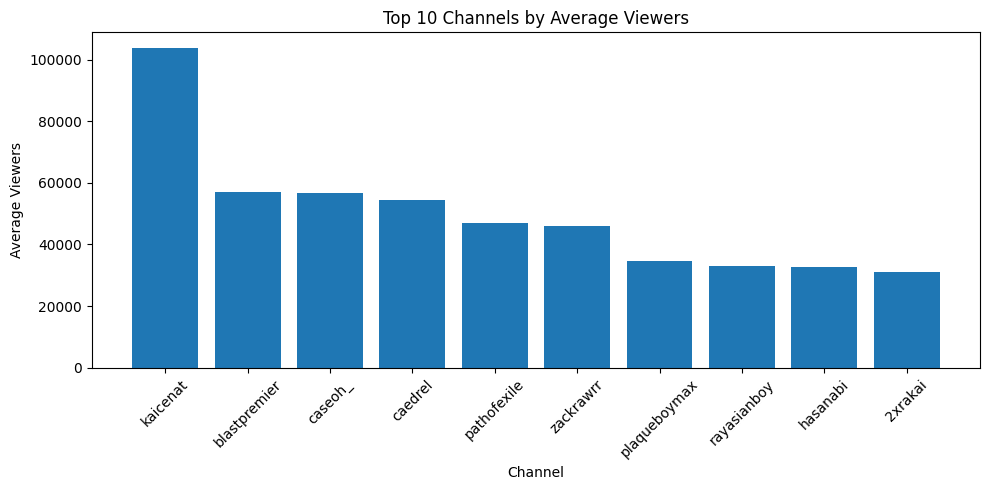

In [ ]:
# Top 10 channels by average viewers
top_channels = df.sort_values(by='average_viewers', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top_channels['handle'], top_channels['average_viewers'])
plt.title('Top 10 Channels by Average Viewers')
plt.xlabel('Channel')
plt.ylabel('Average Viewers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

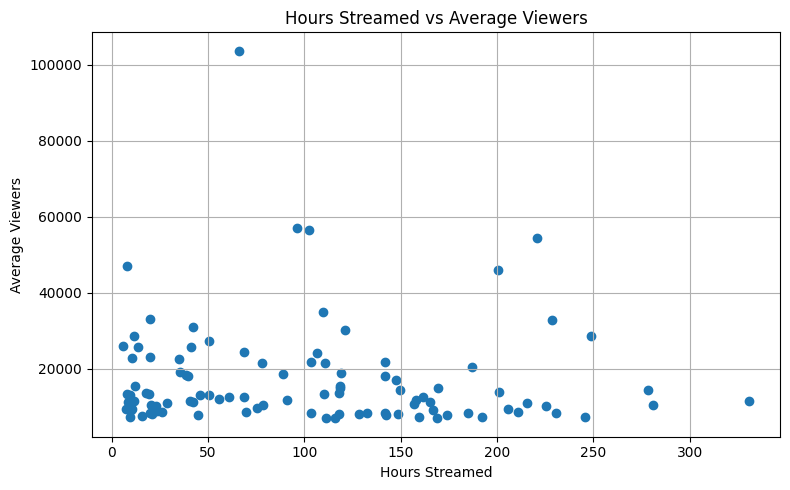

In [ ]:
# Scatter plot: Hours Streamed vs Average Viewers
plt.figure(figsize=(8,5))
plt.scatter(df['hours_streamed'], df['average_viewers'])
plt.title('Hours Streamed vs Average Viewers')
plt.xlabel('Hours Streamed')
plt.ylabel('Average Viewers')
plt.grid(True)
plt.tight_layout()
plt.show()

### 📌 Summary Insights
- Channels with high average viewership don't always stream the most.
- Some top streamers achieve strong engagement with fewer hours.
- Viewer count efficiency helps identify high-potential creators.